In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import socket
import pickle
import random
from Pyfhel import Pyfhel
from Crypto.Cipher import AES #pip install pycryptodome
from base64 import b64encode, b64decode
import os

In [2]:
class Dec_Tree():
    
    def __init__(self,file_link,delimiter,save_filename):
        
        self.data = pd.read_csv(file_link,delimiter)
        self.x = self.data[self.data.columns[0:-1]]
        self.y = self.data[self.data.columns[-1]]
        self.encoding()
        self.feature_names = self.data.columns[:-1]
        self.target_names = self.data.columns[-1]
        self.savefile = save_filename
        self.save = 0
                
    def encoding(self):
        self.y = self.y.astype('category')
        self.y = self.y.cat.codes
        
    def print_data(self):
        print (self.x)
        print (self.y)
        
    def train_test(self):
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(self.x,self.y,test_size=0.2,random_state=20)
        
    def run_model(self):
        self.train_test()
        self.dec_tree = DecisionTreeClassifier(random_state=0,max_depth=6)
        self.dec_tree.fit(self.train_x,self.train_y)
        self.thresholds = self.dec_tree.tree_.threshold
        self.features_split_tree = self.dec_tree.tree_.feature
    
    def visualize(self):
        plt.figure(figsize=(25,10))
        self.visualize = plot_tree(self.dec_tree)
        #print (self.thresholds)
        #print (self.features_split_tree)
        
    def save_model(self):
        pickle.dump(self.dec_tree, open(self.savefile, 'wb'))
        self.save = 1
    
    def load_model(self):
        if(self.save):
            self.dec_model = pickle.load(open(self.savefile, 'rb'))
            
    
        
        
        

In [3]:
class User(Dec_Tree):
    
    def Pyfhel_Object(self):
        self.pyf = Pyfhel()
        
    def public_parameters(self,public):
        self.pp = self.pyf.contextGen(p=65537, m=1024, flagBatching=True) 
        
    def key_generation(self):
        self.pyf.keyGen()
        
    def aes_tree(self,block_size):
        self.block_size = block_size
        self.aes_secret_key = os.urandom(self.block_size)  #generate aes object
        self.aes_cipher = AES.new(self.aes_secret_key, AES.MODE_CBC, iv=b'0123456789abcdef')  # create a cipher object using the random secret
        
        
    
        
        

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8


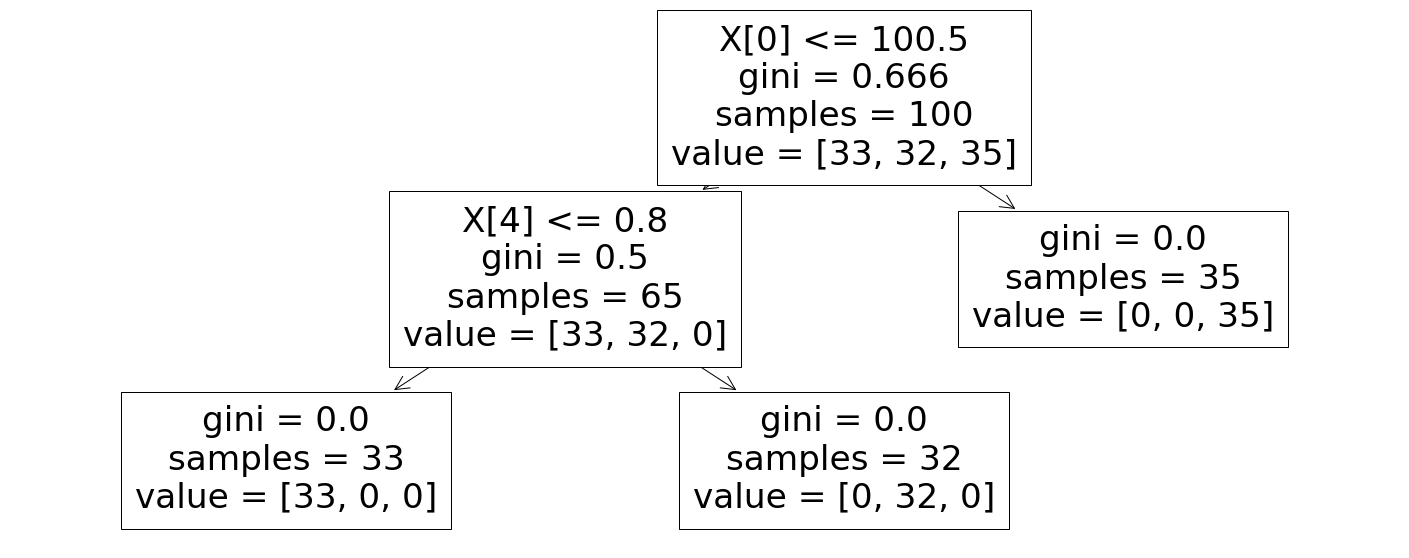

In [4]:
if __name__ == "__main__":
    r = User('Iris.csv',',','Iris_data.sav')
    r.print_data()
    r.run_model()
    r.visualize()